In [1]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
#read in the data
df = pd.read_csv("5_9_25_antagonist_as_antagonist_screen_redo_with_multichannel.csv", index_col=0)  # Set the first column as row index

In [3]:
df

,OxA,DMSO,d33,d34,d35,d36,d37,d38,d39,d40,...,d54,d55,d56,d57,d58,d59,d60,d61,d62,d63
sample 1,1235520.000,66840.00000,81880.0000,22040.00000,327200.0000,8800.00000,585560,129200,499960.0000,24680.00000,...,52240.0000,936240.0000,300040,652120.0000,332400.0000,358040,433840,425440,270520.0000,288240.0000
sample 2,1191360.000,41480.00000,347400.0000,30800.00000,188160.0000,60120.00000,337320,390720,443200.0000,82560.00000,...,272720.0000,519840.0000,248760,350080.0000,275560.0000,320800,349480,331080,252080.0000,239080.0000
sample 3,675680.000,54720.00000,439320.0000,55920.00000,159600.0000,46960.00000,251440,224800,238200.0000,86400.00000,...,106840.0000,258280.0000,187760,479000.0000,166840.0000,105960,182800,11840,14240.0000,10240.0000
average,1034186.667,54346.66667,289533.3333,36253.33333,224986.6667,38626.66667,391440,248240,393786.6667,64546.66667,...,143933.3333,571453.3333,245520,493733.3333,258266.6667,261600,322040,256120,178946.6667,179186.6667


In [4]:
# Get the divisor: OxA at "average" row
divisor = df.loc["average", "OxA"]

# Divide the entire DataFrame by that value
df_normalized = df / divisor

#set df_normalized to df
df = df_normalized

In [5]:
#get mean and std dev
column_means = df.mean(axis=0)  # Mean of each column
column_stds = df.std(axis=0)    # Standard deviation of each column

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


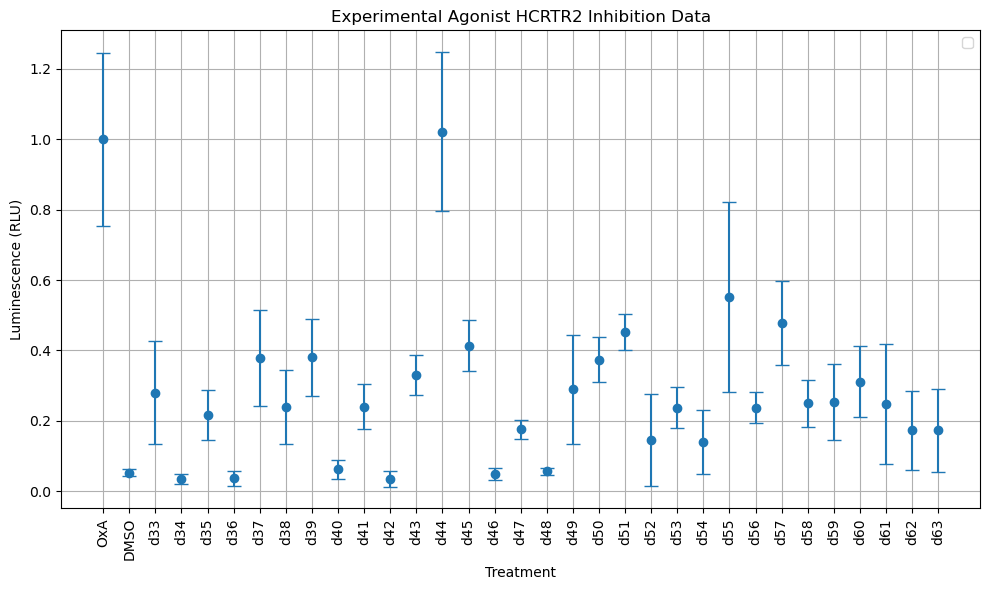

In [6]:
#make plot


plt.figure(figsize=(10, 6))
plt.errorbar(column_means.index, column_means, yerr=column_stds, fmt='o', capsize=5)

# Customizing the plot
plt.title('Experimental Agonist HCRTR2 Inhibition Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
drug_data = df.transpose()
# Drop the row for the drug named "Suvorexant"
#drug_data = drug_data.drop("Suvorexant", axis=0)
drug_data

,sample 1,sample 2,sample 3,average
OxA,1.194678,1.151978,0.653344,1.000000
DMSO,0.064630,0.040109,0.052911,0.052550
d33,0.079173,0.335916,0.424798,0.279962
d34,0.021311,0.029782,0.054071,0.035055
d35,0.316384,0.181940,0.154324,0.217549
d36,0.008509,0.058133,0.045408,0.037350
d37,0.566203,0.326169,0.243128,0.378500
d38,0.124929,0.377804,0.217369,0.240034
d39,0.483433,0.428549,0.230326,0.380769
d40,0.023864,0.079831,0.083544,0.062413


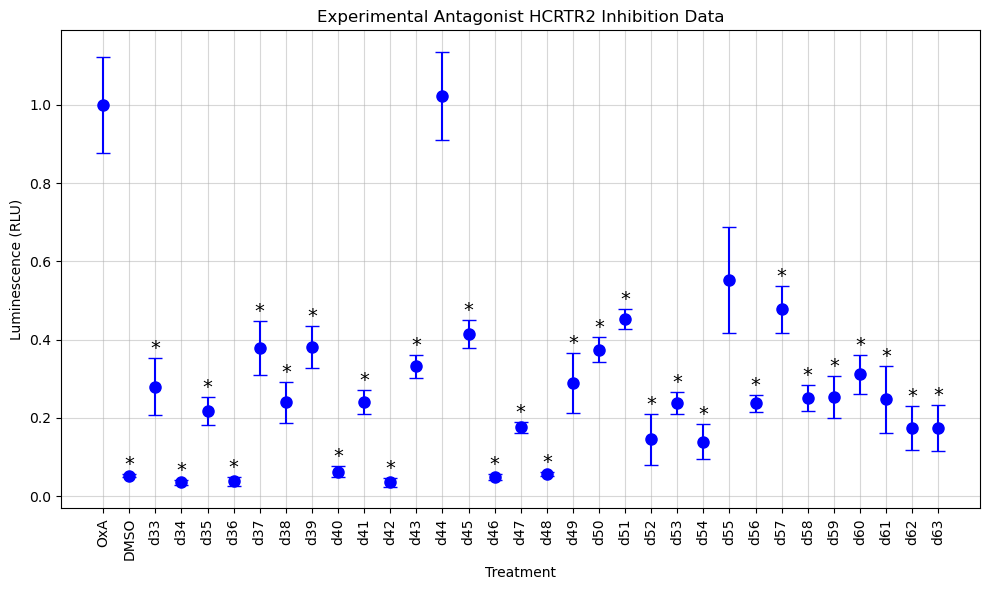

In [8]:
# Extract drug names from the index (row headers)
drug_names = drug_data.index  # Drug names are now the row index
replicates = drug_data  # Replicates are the rest of the data (without the row names)

# Step 2: Calculate mean and standard error for each drug
drug_means = replicates.mean(axis=1)  # Mean across replicates (rows for each drug)
drug_sems = replicates.sem(axis=1)  # Standard error across replicates (rows for each drug)

# Step 3: Perform statistical analysis (t-test against the first drug)
# The first drug is now the first row in the data (first index)
first_drug_values = replicates.iloc[0, :]  # First drug's replicates

# Store p-values for the comparisons
p_values = []

for i, drug in enumerate(drug_names):
    # Compare each drug's data with the first drug using a t-test
    drug_values = replicates.iloc[i, :]  # Data for the current drug
    _, p_value = stats.ttest_ind(first_drug_values, drug_values, equal_var=False)  # Welch's t-test
    p_values.append(p_value)

# Step 4: Plot the data with error bars
plt.figure(figsize=(10, 6))

# Specify a color for all data points (e.g., 'blue')
color = 'blue'

# Plot the drugs with error bars and set all data points to the same color
for i, drug in enumerate(drug_names):
    plt.errorbar(
        [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color=color
    )

# Add asterisks for statistical significance
for i, p_value in enumerate(p_values):
    if p_value < 0.05:
        plt.text(
            i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"
        )

# Customize the plot
plt.title('Experimental Antagonist HCRTR2 Inhibition Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(np.arange(len(drug_names)), drug_names, rotation=90, ha="center")
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()